In [26]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import scprep

In [27]:
df = pd.read_csv('../data/mioflow_balanced_subsampled.csv', index_col=0)

<Axes: xlabel='d1', ylabel='d2'>

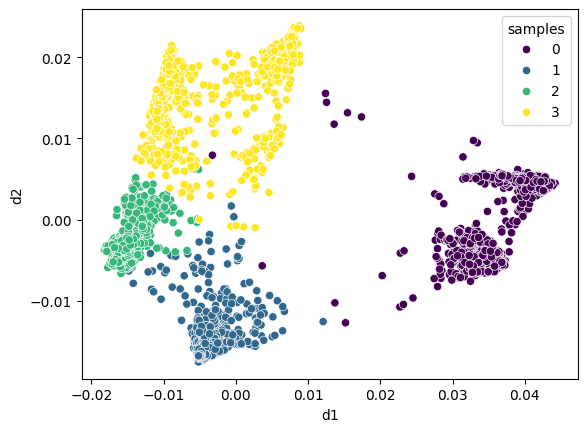

In [28]:
sns.scatterplot(data=df, x='d1', y='d2', hue='samples', palette='viridis')

In [29]:
df['samples'].value_counts()

0    1000
1    1000
2    1000
3    1000
Name: samples, dtype: int64

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


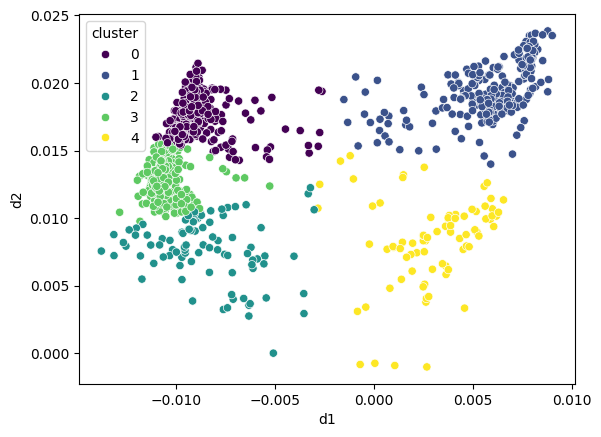

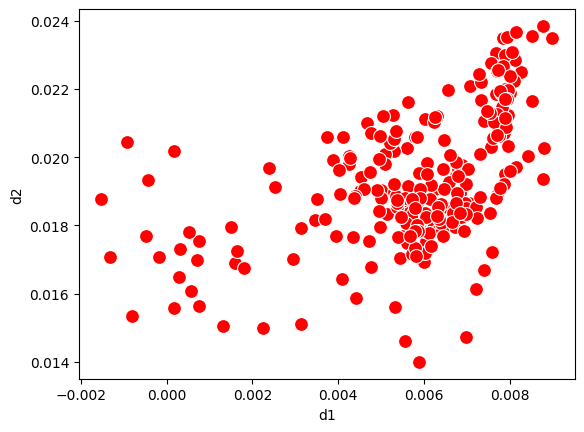

3    321
0    260
1    246
2     91
4     82
Name: cluster, dtype: int64

In [30]:
df_last = df[df['samples']==3].copy()
km = KMeans(n_clusters=5, random_state=0)
km.fit(df_last[['d1', 'd2']])
df_last['cluster'] = km.labels_
sns.scatterplot(data=df_last, x='d1', y='d2', hue='cluster', palette='viridis')
plt.show()
sns.scatterplot(df_last[df_last['cluster']==1], x='d1', y='d2', color='red', s=100)
plt.show()
df_last['cluster'].value_counts()

In [31]:
df.loc[df_last[df_last['cluster'].isin([0,1,3])].index, 'samples'] = 4
# df.loc[df_last[df_last['cluster'].isin([4])].index, 'samples'] = 2

<Axes: xlabel='d1', ylabel='d2'>

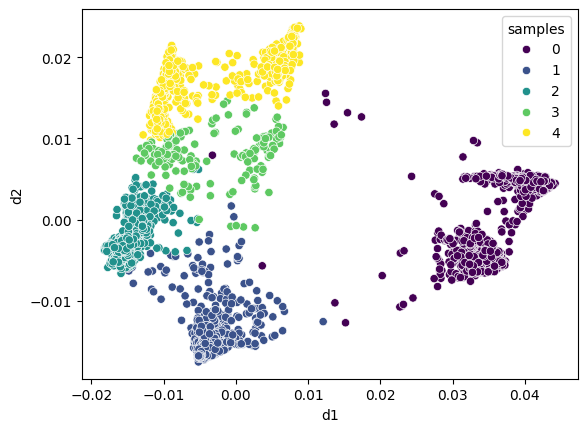

In [32]:
sns.scatterplot(data=df, x='d1', y='d2', hue='samples', palette='viridis')


/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


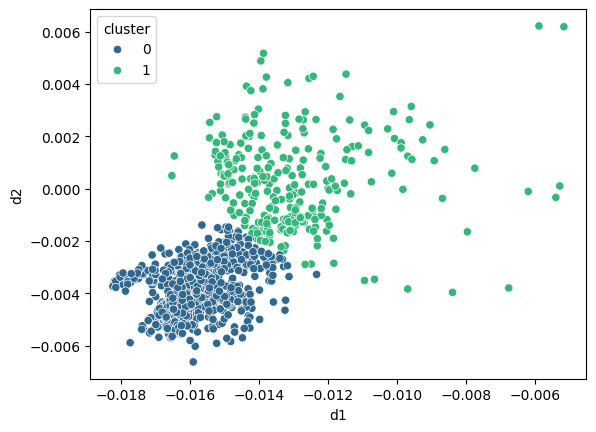

0    732
1    268
Name: cluster, dtype: int64

In [33]:
df_last = df[df['samples']==2].copy()
km = KMeans(n_clusters=2, random_state=0)
km.fit(df_last[['d1', 'd2']])
df_last['cluster'] = km.labels_
sns.scatterplot(data=df_last, x='d1', y='d2', hue='cluster', palette='viridis')
plt.show()
df_last['cluster'].value_counts()

In [34]:
df.loc[df_last[df_last['cluster'].isin([1])].index, 'samples'] = 3

<Axes: xlabel='d1', ylabel='d2'>

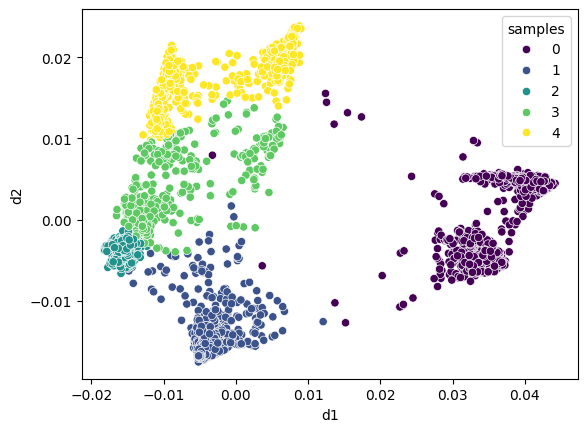

In [35]:
sns.scatterplot(data=df, x='d1', y='d2', hue='samples', palette='viridis')


In [36]:
df.to_csv('../data/mioflow_balanced_subsampled_addpt2.csv')